In [1]:
import numpy as np
import subprocess
from mpl_toolkits import mplot3d
import ipympl
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from tabulate import tabulate
from tqdm import tqdm

Lets draw time (N) for square matrix

[  20   30   40   50  100  200  300  400  500  600  700  800  900 1000
 1200 1400 1500 1550 1600 1700 1800]


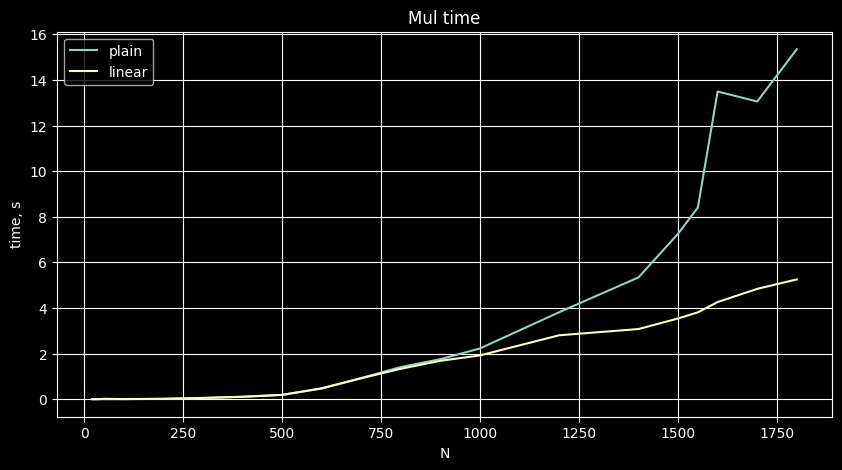

In [2]:
num_algos = 2
num_threads = 4
algos = []
algos.append ("plain")
algos.append ("linear")

Ns = np.array ((20, 30, 40, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1400, 1500, 1550, 1600, 1700, 1800))
num_points = Ns.shape[0]
times = np.zeros ((num_algos, num_points))

for i in range(0, num_points):
    result = subprocess.run (["./matmul_test", "{0}".format (Ns[i]), "{0}".format (Ns[i]), "{0}".format (num_threads)], capture_output=True, text=True)
    res_split = result.stdout.split ()
    for j in range (0, num_algos):
        times[j][i] = np.double(res_split[j])

plt.figure(figsize=(10, 5))
#plt.yscale('log')
#plt.xscale('log')
plt.grid ()
plt.title ("Mul time")
plt.xlabel ("N")
plt.ylabel ("time, s")
for i in range(0, num_algos):
    plt.plot (Ns, times[i], 'C{0}'.format (i), label = algos[i])
plt.legend ()

Lets draw time, speedup and efficiency (num_threads) for small square matrix 

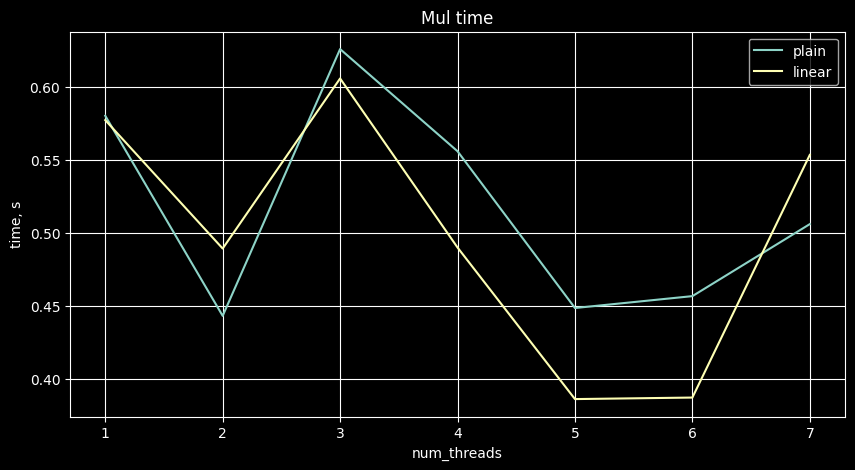

In [12]:
N = 600
num_threads = np.arange (1, 8, 1)
times = np.zeros ((num_algos, num_threads.shape[0]))

for i in range (0, num_threads.shape[0]):
    result = subprocess.run (["./matmul_test", "{0}".format (N), "{0}".format (N), "{0}".format (num_threads[i])], capture_output=True, text=True)
    res_split = result.stdout.split ()
    for j in range (0, num_algos):
        times[j][i] = np.double(res_split[j])
plt.figure(figsize=(10, 5))
#plt.yscale('log')
#plt.xscale('log')
plt.grid ()
plt.title ("Mul time")
plt.xlabel ("num_threads")
plt.ylabel ("time, s")
for i in range(0, num_algos):
    plt.plot (num_threads, times[i], 'C{0}'.format (i), label = algos[i])
plt.legend ()